<a href="https://colab.research.google.com/github/karsarobert/Deep-Learning-2022/blob/main/03/PTE_DL3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning gyakorlat


## 3. gyakorlat: gradiens süllyedés
### 2022. szeptrember 21.

# Lineáris regresszió
## A dolgozat pontszámának előrejelzése a tanulásra fordított idő alapján

forrás: https://github.com/kaustubholpadkar/

### Import Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### Read Data

In [ ]:
data = np.genfromtxt('https://raw.githubusercontent.com/kaustubholpadkar/Linear_Regression-Gradient_Descent-Octave/master/data.csv', delimiter=',')

In [ ]:
data.shape #adatok alakja 100 tanulóadat

(100, 2)

In [ ]:
data[:5,:] #az első 5 adatsor elsőoszlop az X bemenet második oszlop y kimenet

array([[32.50234527, 31.70700585],
       [53.42680403, 68.77759598],
       [61.53035803, 62.5623823 ],
       [47.47563963, 71.54663223],
       [59.81320787, 87.23092513]])

### Seperate Data into X and Y

In [ ]:
X = data[:, 0]
Y = data[:, 1]

### Visualize the Data

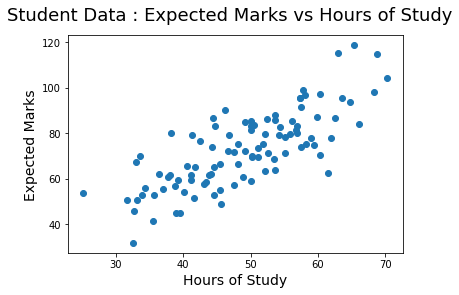

In [ ]:
fig = plt.figure()
plt.scatter(X, Y)
fig.suptitle('Student Data : Expected Marks vs Hours of Study', fontsize=18)
plt.xlabel('Hours of Study', fontsize=14)
plt.ylabel('Expected Marks', fontsize=14)
plt.show()

### Hyperparameters

In [ ]:
learning_rate = 0.0001
max_iteration = 50

### Parameters

In [ ]:
m = 1
b = 1

### Hypothesis

In [ ]:
def h (m, b, X) :
  return m * X + b

### Loss Function

In [ ]:
def loss (m, b, X, Y) :
  return np.average(np.square(Y - h(m, b, X))) / 2

### Calculate Gradients

In [ ]:
def gradient (m, b, X, Y) :
  dm = - np.average((Y - h(m, b, X)) * X) # loss függvény m szerinti deriváltja
  db = - np.average(Y - h(m, b, X)) # loss függvény b szerinti deriváltja
  return (dm, db)

In [ ]:
print(Y[:3], h(m, b, X)[:3])

[31.70700585 68.77759598 62.5623823 ] [33.50234527 54.42680403 62.53035803]


### Gradient Descent

In [ ]:
def gradient_descent (m, b, X, Y, learning_rate, max_iteration) :
  for i in range(max_iteration) :
    dm, db = gradient (m, b, X, Y)
    m -= learning_rate * dm
    b -= learning_rate * db
    if i % 10 == 0 :
      print ('iteration : ', i, ' loss : ', loss(m, b, X, Y)) 
  return (m, b)

### Train Model

In [ ]:
m, b = gradient_descent (m, b, X, Y, learning_rate, max_iteration)

iteration :  0  loss :  204.50666115574057
iteration :  10  loss :  56.52985181213651
iteration :  20  loss :  56.05030590326913
iteration :  30  loss :  56.04868285547168
iteration :  40  loss :  56.04860838575527


### Optimal values of Parameters using Trained Model

In [ ]:
m, b

(1.4596336737329105, 1.0103518029193468)

### Visualize the Data

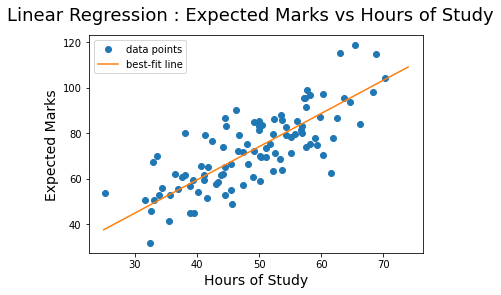

In [ ]:
fig = plt.figure()

# Generate data for plotting Line
x = np.arange(25, 75)
y = [m * x_i + b for x_i in x]


# plot data and best-fit lines
plt.plot(X, Y, 'o', x, y, '-')
plt.legend(loc='upper left', labels=['data points', 'best-fit line'])

fig.suptitle('Linear Regression : Expected Marks vs Hours of Study', fontsize=18)
plt.xlabel('Hours of Study', fontsize=14)
plt.ylabel('Expected Marks', fontsize=14)
plt.show()